In [5]:
import pandas as pd
import seaborn as sbn
import matplotlib as mpl

In [6]:
pokemon_data = pd.read_csv("../input/Pokemon.csv", index_col=0)
pokemon_data

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False


# Seaborn :

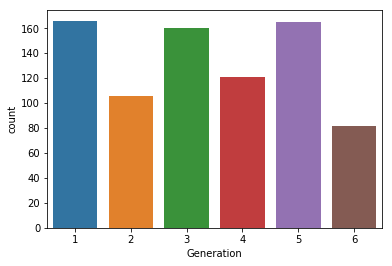

In [7]:
sbn.countplot(pokemon_data["Generation"])

/home/codemantra/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



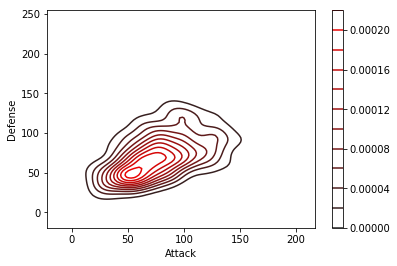

In [8]:
sbn.kdeplot(
    pokemon_data["Attack"], pokemon_data["Defense"], cbar=True, color="r")

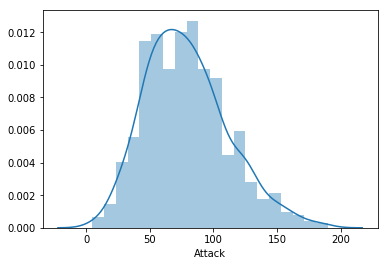

In [9]:
sbn.distplot(pokemon_data["Attack"])

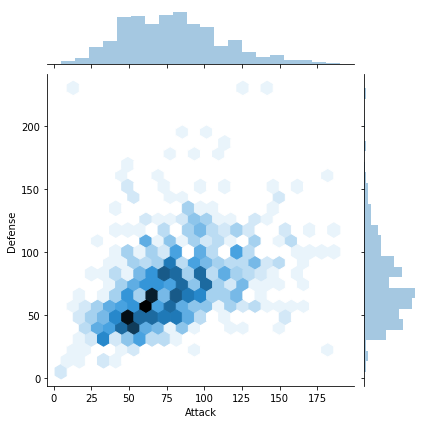

In [10]:
sbn.jointplot(x = "Attack", y = "Defense", data = pokemon_data, kind="hex")

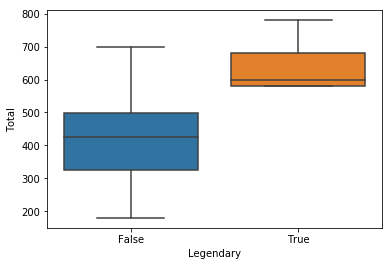

In [11]:
sbn.boxplot(x = "Legendary", y = "Total", data = pokemon_data)

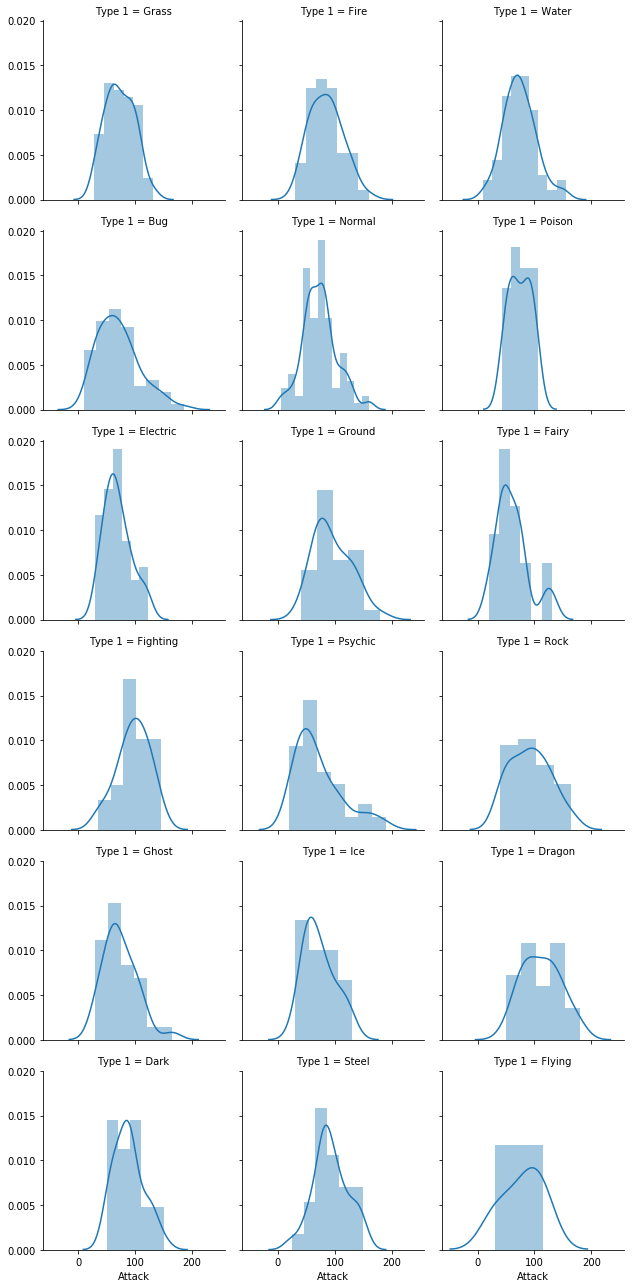

In [12]:
graph = sbn.FacetGrid(pokemon_data, col = "Type 1", col_wrap=3)
graph.map(sbn.distplot, "Attack")

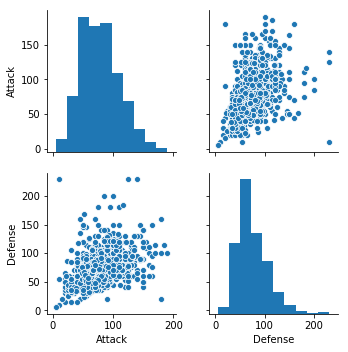

In [13]:
sbn.pairplot(pokemon_data[["Attack", "Defense"]])

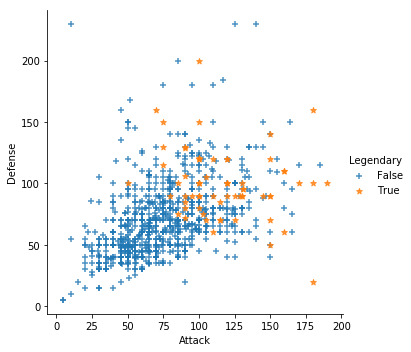

In [14]:
sbn.lmplot(
    x="Attack",
    y="Defense",
    data=pokemon_data,
    markers=['+', '*'],
    hue="Legendary",
    fit_reg=False)

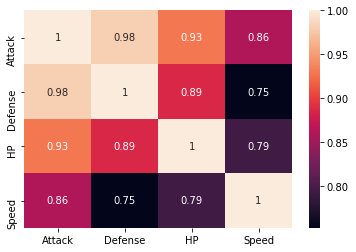

In [15]:
sbn.heatmap(
    (pokemon_data.head()[["Attack", "Defense", "HP", "Speed"]]).corr(), annot=True)

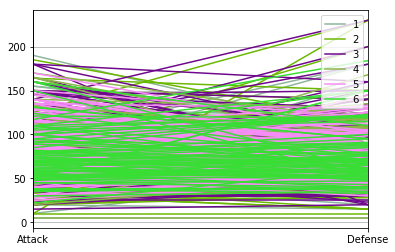

In [16]:
from pandas.plotting import parallel_coordinates
parallel_coordinates(pokemon_data.loc[:, ["Attack", "Defense", "Generation"]], "Generation")

# Plotly


In [20]:
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

In [21]:
iplot([
    go.Scatter(
        x=pokemon_data.head(100)['Attack'],
        y=pokemon_data.head(100)['Defense'],
        mode='markers')
])

In [28]:
df = pokemon_data.assign(n=0).groupby(['Attack', 'Defense'])['n'].count().reset_index()
df = df[df["Attack"] > 10]
v = df.pivot(index='Attack', columns='Defense', values='n').fillna(0).values.tolist()
iplot([go.Surface(z=v)])